<a href="https://colab.research.google.com/github/SDS-AAU/SDS-master/blob/master/M2/exercises/M2_workshop_NW_Assignment_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load packages

import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

In [ ]:
gh_path = "https://github.com/SDS-AAU/SDS-master/raw/master/00_data/network_krackhard/"

In [ ]:
# Loading up the data
# Note, that the data is space-separated and very "raw"
# also need to skip the header and cut off the first column

attributes = pd.read_csv(gh_path + 'Krack-High-Tec-Attributes.csv')
attributes.columns = [column.lower() for column in attributes.columns]

el_advice = pd.read_csv(gh_path + 'Krack-High-Tec-edgelist-Advice.txt', sep=' ', header = None)
el_advice = el_advice.iloc[:,1:]
el_advice.columns = ['ego', 'alter', 'advice_tie']

el_friendship = pd.read_csv(gh_path + 'Krack-High-Tec-edgelist-Friendship.txt', sep=' ', header = None)
el_friendship = el_friendship.iloc[:,1:]
el_friendship.columns = ['ego', 'alter', 'friendship_tie']

el_reports = pd.read_csv(gh_path + 'Krack-High-Tec-edgelist-ReportsTo.txt', sep=' ', header = None)
el_reports = el_reports.iloc[:,1:]
el_reports.columns = ['ego', 'alter', 'reports_tie']

In [ ]:
el_advice

,ego,alter,advice_tie
0,1,1,0
1,1,2,1
2,1,3,0
3,1,4,1
4,1,5,0
...,...,...,...
436,21,17,1
437,21,18,1
438,21,19,0
439,21,20,1


In [ ]:
# rounding helps later on when dealing with assortativity
attributes = attributes.round().astype(int)

In [ ]:
attributes

,id,age,tenure,level,dept
0,1,33,9,3,4
1,2,42,20,2,4
2,3,40,13,3,2
3,4,33,8,3,4
4,5,32,3,3,2
5,6,59,28,3,1
6,7,55,30,1,0
7,8,34,11,3,1
8,9,62,5,3,2
9,10,37,9,3,3


In [ ]:
# Create directed graph
G = nx.DiGraph()

In [ ]:
# Filter for those entries where a specific tie exists (subset of pandas DF)
el_reports_1 = el_reports[el_reports.reports_tie == 1]

# Growing graph by adding edges (as a list of tuple --> zip 2 columns of the DF), adding arguments/labels is very open in networkx,
# thats why we can just write reports_tie as an argument and set it to 1
# some edges will have more than one type of tie

G.add_edges_from(zip(el_reports_1.ego, el_reports_1.alter), reports_tie=1)

# and the same below 2 more times for the other graphs

In [ ]:
el_friendship_1 = el_friendship[el_friendship.friendship_tie == 1]
G.add_edges_from(zip(el_friendship_1.ego, el_friendship_1.alter), friendship_tie=1)

In [ ]:
el_advice_1 = el_advice[el_advice.advice_tie == 1]
G.add_edges_from(zip(el_advice_1.ego, el_advice_1.alter), advice_tie=1)

In [ ]:
attributes.head()

,id,age,tenure,level,dept
0,1,33,9,3,4
1,2,42,20,2,4
2,3,40,13,3,2
3,4,33,8,3,4
4,5,32,3,3,2


In [ ]:
# Setting the node attributes

# Setting the index as id
attributes.set_index('id', inplace=True)

# Creating a dictionary from the Dataframe transponse that we can pass as note attributes for our graph
attributes_dict = attributes.T.to_dict()

# Setting node attributes
nx.set_node_attributes(G, attributes_dict)

In [ ]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 21
Number of edges: 232
Average in degree:  11.0476
Average out degree:  11.0476


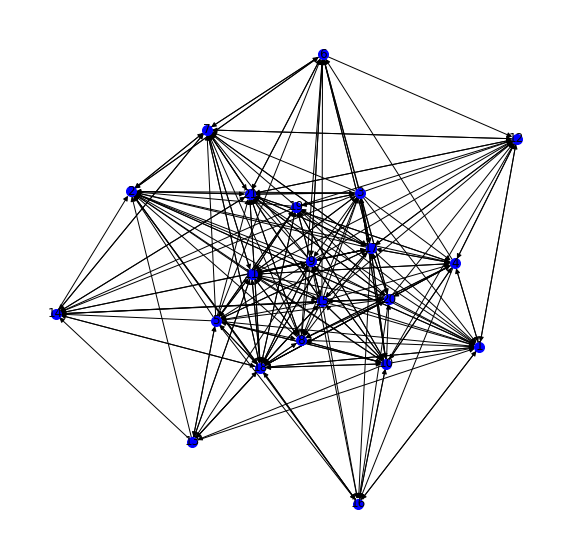

In [ ]:
# A not too pretty first viz (of the full Graph with all edges imported)
plt.figure(figsize=(10, 10))
pos=nx.spring_layout(G, k=0.15)
nx.draw_networkx(G,pos,node_size=100, node_color='blue')
plt.axis('off') # We don't need axis
plt.show()

In [ ]:
print('Density')
print(nx.density(G))
print()
print('Transitivity')
print(nx.transitivity(G))
print()
print('Reciprocity')
print(nx.reciprocity(G))

Density
0.5523809523809524

Transitivity
0.5609929078014184

Reciprocity
0.6293103448275862


In [ ]:
def print_nw_measures(G):
  print('Density')
  print(nx.density(G))
  print()
  print('Transitivity')
  print(nx.transitivity(G))
  print()
  print('Reciprocity')
  print(nx.reciprocity(G))

In [ ]:
ties = ['advice_tie', 'friendship_tie', 'reports_tie']

for tie in ties:
  G_sub = G.edge_subgraph([(u,v) for u,v,d in G.edges(data=True) if tie in d.keys()])
  print('########')
  print('Tie type: ' + tie )
  print_nw_measures(G_sub)


########
Tie type: advice_tie
Density
0.4523809523809524

Transitivity
0.4651600753295669

Reciprocity
0.47368421052631576
########
Tie type: friendship_tie
Density
0.24285714285714285

Transitivity
0.27581863979848864

Reciprocity
0.45098039215686275
########
Tie type: reports_tie
Density
0.047619047619047616

Transitivity
0

Reciprocity
0.0


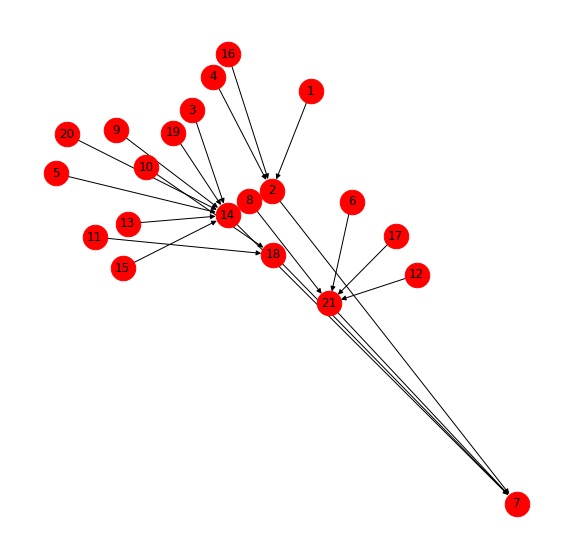

In [ ]:
# See the hierarchy
G_rep = G.edge_subgraph([(u,v) for u,v,d in G.edges(data=True) if 'reports_tie' in d.keys()])
plt.figure(figsize=(10, 10))
pos=nx.spring_layout(G_rep, k=0.08)
nx.draw_networkx(G_rep,pos,node_size=600, node_color='red')
plt.axis('off')

plt.show()

In [ ]:
# Finding the most popular person in the 3 sub-networks

ties = ['advice_tie', 'friendship_tie', 'reports_tie']

for tie in ties:
  G_sub = G.edge_subgraph([(u,v) for u,v,d in G.edges(data=True) if tie in d.keys()])
  in_degrees = nx.in_degree_centrality(G_sub)
  # a quick transformation to pandas Series
  in_degrees_series = pd.Series(in_degrees)
  max_degree = in_degrees_series.max()
  print('####')
  print('Tie type: ' + tie)
  print(in_degrees_series[in_degrees_series == max_degree])

####
Tie type: advice_tie
2    0.9
dtype: float64
####
Tie type: friendship_tie
2    0.5
dtype: float64
####
Tie type: reports_tie
14    0.35
dtype: float64


In [ ]:
# more power more popularity ?

for tie in ties:
  G_sub = G.edge_subgraph([(u,v) for u,v,d in G.edges(data=True) if tie in d.keys()])
  in_degrees = nx.in_degree_centrality(G_sub)
  # a quick transformation to pandas Series
  in_degrees_series = pd.Series(in_degrees)
  print('####')
  print('Tie type: ' + tie)
  print(pd.concat([attributes, in_degrees_series], axis=1).groupby(by='level')[0].mean())
  

####
Tie type: advice_tie
level
1    0.650000
2    0.725000
3    0.371875
Name: 0, dtype: float64
####
Tie type: friendship_tie
level
1    0.150000
2    0.300000
3    0.234375
Name: 0, dtype: float64
####
Tie type: reports_tie
level
1    0.2
2    0.2
3    0.0
Name: 0, dtype: float64


In [ ]:
group_types_nodept = attributes.columns[:-1]

In [ ]:
group_types_nodept

Index(['age', 'tenure', 'level'], dtype='object')

In [ ]:
# homophily within groups

for tie in ties:
  G_sub = G.edge_subgraph([(u,v) for u,v,d in G.edges(data=True) if tie in d.keys()])
  print('#######')
  print(tie)
  for x in group_types_nodept:
    print(x)
    print(nx.numeric_assortativity_coefficient(G_sub,x))
  print('dept')
  print(nx.attribute_assortativity_coefficient(G_sub,'dept'))

#######
advice_tie
age
0.038759800643935395
tenure
0.15435221501396326
level
0.05539744799972084
dept
0.02390296111309304
#######
friendship_tie
age
0.10028705775002852
tenure
-0.09737382143409863
level
0.25924465704772787
dept
0.15908798145047023
#######
reports_tie
age
-0.04604209794299687
tenure
0.07043558221102793
level
1.0000000000000056
dept
0.738562091503268


In [ ]:
partitions = []

for x in sorted(attributes.dept.unique()):
  partitions.append(list(attributes[attributes.dept == x].index))
  
ties_new = ['friendship_tie', 'advice_tie']

In [ ]:
Graphs = []
for tie in ties_new:
  G_sub = G.edge_subgraph([(u,v) for u,v,d in G.edges(data=True) if tie in d.keys()])
  agg_nw = nx.quotient_graph(G_sub, partitions, relabel = True)
  Graphs.append(agg_nw)
  print(pd.DataFrame(list(agg_nw.edges(data=True))))
 

    0  1               2
0   1  0   {'weight': 2}
1   1  2  {'weight': 12}
2   1  3   {'weight': 8}
3   1  4  {'weight': 15}
4   2  0   {'weight': 1}
5   2  1  {'weight': 12}
6   2  3  {'weight': 16}
7   2  4   {'weight': 4}
8   3  1   {'weight': 8}
9   3  2  {'weight': 16}
10  3  4   {'weight': 6}
11  4  1  {'weight': 15}
12  4  3   {'weight': 6}
    0  1               2
0   0  1   {'weight': 8}
1   0  2   {'weight': 7}
2   0  3   {'weight': 4}
3   0  4   {'weight': 2}
4   1  0   {'weight': 8}
5   1  2  {'weight': 28}
6   1  3   {'weight': 8}
7   1  4  {'weight': 16}
8   2  0   {'weight': 7}
9   2  1  {'weight': 28}
10  2  3  {'weight': 33}
11  2  4  {'weight': 22}
12  3  0   {'weight': 4}
13  3  1   {'weight': 8}
14  3  2  {'weight': 33}
15  3  4  {'weight': 16}
16  4  0   {'weight': 2}
17  4  1  {'weight': 16}
18  4  2  {'weight': 22}
19  4  3  {'weight': 16}


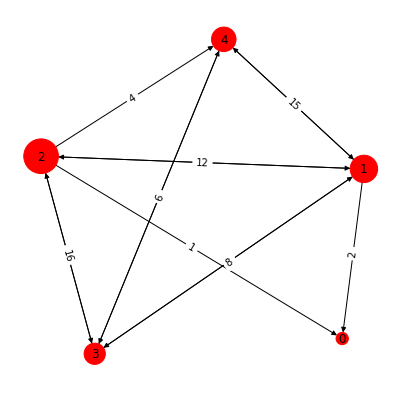

In [ ]:
# plotting graph
node_size = [Graphs[0].nodes[x]['nnodes'] * 150 for x in Graphs[0].nodes()]
plt.figure(figsize=(7, 7))
pos=nx.spring_layout(Graphs[0], k=70)
nx.draw_networkx(Graphs[0],pos,node_size=node_size, node_color='red', with_labels=True) # adding node_size
labels = nx.get_edge_attributes(Graphs[0],'weight') # I want to se weight of edges as number
nx.draw_networkx_edge_labels(Graphs[0],pos,edge_labels=labels) # Setting labels of edges using our variable
plt.axis('off') # We don't need axis
plt.show()

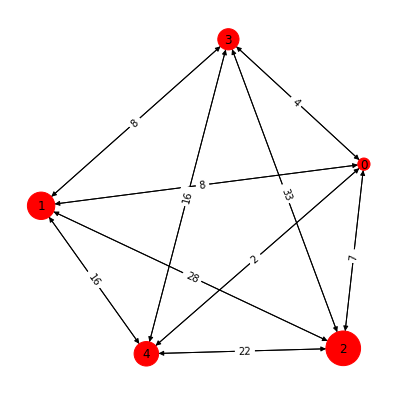

In [ ]:
# plotting graph
node_size = [Graphs[1].nodes[x]['nnodes'] * 150 for x in Graphs[1].nodes()]
plt.figure(figsize=(7, 7))
pos=nx.spring_layout(Graphs[1], k=70)
nx.draw_networkx(Graphs[1],pos,node_size=node_size, node_color='red', with_labels=True) # adding node_size
labels = nx.get_edge_attributes(Graphs[1],'weight') # I want to se weight of edges as number
nx.draw_networkx_edge_labels(Graphs[1],pos,edge_labels=labels) # Setting labels of edges using our variable
plt.axis('off') # We don't need axis
plt.show()